In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#In the next cell, add the following code that we used to generate the random latitudes. 
#Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes
#, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) 
#as pairs by zipping them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#When we run this cell, the output is a zip object in memory.

In [4]:
#The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. 
#If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, 
#where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

#Let's practice zipping a small number of latitudes and longitudes and then unpacking the zipped tuple 
#to see how the packing and unpacking work.

#In a new Jupyter Notebook file called API_practice.ipynb, add the following lists 
#and pack them into the zipped tuple. Then, run the cell.

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
#You can only unzip a zipped tuple once before it is removed from the computer's memory. 
#Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-58.797682545771025 -134.12641698408729
-32.69539122443489 -99.71277581018077
14.892269200874864 -69.74452726333514
74.31258795342288 -126.69317807838593
-61.11227704158511 -107.47211011055978
70.5330865789625 109.66014428179778
-5.894378655431595 137.85508414734676
41.821939374633274 3.428340704078977
-60.12906830624178 35.74148915505822
-52.5580012648786 109.9554176331693
-46.873270036472405 -113.97870475909613
-79.09016014875722 79.5448751834515
-61.76172904889836 28.286872074234793
3.557774000517142 127.80363582231024
-29.577202366040346 -25.423860761648257
-25.7009207437861 -36.631623932349925
-36.37620208025487 76.80656321802525
-32.729898725615435 97.31460959313182
31.800958024148983 80.66332445238055
66.01324477690483 82.82071627374779
30.883109267837057 53.90149453144238
46.03980852438369 138.35938761808643
52.84463260591855 51.18420177765282
23.832098028926723 85.75150016196244
-14.7988696736426 -123.13836284636915
81.5232653839596 -39.86461253701998
39.89300628547164 -16.499

In [7]:
#Now that we have our ordered pairs of latitudes and longitudes in a list, 
#we can iterate through the list of tuples and find the nearest city to those coordinates.

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=514b66a8c3ba0c8701f09a181b4a138f


In [17]:
#Next, add the following code to a new cell, but don't run the cell. Instead, continue to add on to this code block.

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
#Loop Through the List of Cities and Build the City URL
#Next, we need to iterate through our list of cities and begin building 
#the URL for each city, while grouping our records in sets of 50. To do this, 
#use for i in range(len(cities)) and the index to tell us when we get to 50. Once we get to 50, 
#we tell the program to pause for 60 seconds using the time.sleep(60) command. 
#The OpenWeatherMap API only allows 60 calls for per minute on their free tier, 
#so pausing our program for one minute after each set of 50 will prevent time-out errors. 
#We can also retrieve the city from the cities list and add it to the city_url by using indexing, 
#as shown in the following code:
# Loop through all the cities in our list.


#Every time we want to reference the city in our code, we need to use the indexing on the cities list. 
#Unfortunately, this will cause programming errors when we are building the city_url because it adds the index, 
#not the city name, to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list.

#Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate 
#through the list of cities and retrieve both the index, and the city from the list. 
#The syntax for the enumerate() method is the following:
#for i, item in enumerate(list):

#Let's use the enumerate() method to get the index of the city for logging purposes and the city for creating
#an endpoint URL. Add the following code below our counters but don't run it just yet:


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | oranjestad
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | saskylakh
Processing Record 7 of Set 1 | kiunga
Processing Record 8 of Set 1 | palafrugell
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | ternate
Processing Record 14 of Set 1 | vila velha
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | bambous virieux
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | joshimath
Processing Record 19 of Set 1 | krasnoselkup
Processing Record 20 of Set 1 | mehriz
Processing Record 21 of Set 1 | svetlaya
Processing Record 22 of Set 1 | neftegorsk
Processing

In [20]:
len(city_data)

575

In [21]:
#Recall that we can convert a list of dictionaries to a Pandas DataFrame 
#using df = pd.DataFrame(list with dictionaries).

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,72.90,72,19,13.29,PF,2022-09-22 17:06:28
1,Lebu,-37.6167,-73.6500,54.23,78,92,6.04,CL,2022-09-22 17:04:08
2,Oranjestad,12.5240,-70.0270,87.75,66,75,8.05,AW,2022-09-22 17:06:28
3,Tuktoyaktuk,69.4541,-133.0374,33.80,100,100,9.22,CA,2022-09-22 17:06:29
4,Punta Arenas,-53.1500,-70.9167,46.51,66,0,10.36,CL,2022-09-22 17:06:29
5,Saskylakh,71.9167,114.0833,18.16,88,71,4.43,RU,2022-09-22 17:06:29
6,Kiunga,-6.1219,141.2906,71.35,99,99,1.05,PG,2022-09-22 16:59:55
7,Palafrugell,41.9174,3.1631,73.35,56,5,3.00,ES,2022-09-22 17:00:48
8,Port Alfred,-33.5906,26.8910,69.19,56,34,2.51,ZA,2022-09-22 17:00:58
9,Albany,42.6001,-73.9662,62.51,91,99,9.57,US,2022-09-22 16:57:20


In [24]:
#Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

#Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

#new_column_order = ["column2", "column4", "column1"]

#Then, we assign a new or the same DataFrame with new column order:

#df = df[new_column_order]

new_column_order = ["City", "Country","Date","Lat","Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]
city_data_df.head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-09-22 17:06:28,-23.1203,-134.9692,72.90,72,19,13.29
1,Lebu,CL,2022-09-22 17:04:08,-37.6167,-73.6500,54.23,78,92,6.04
2,Oranjestad,AW,2022-09-22 17:06:28,12.5240,-70.0270,87.75,66,75,8.05
3,Tuktoyaktuk,CA,2022-09-22 17:06:29,69.4541,-133.0374,33.80,100,100,9.22
4,Punta Arenas,CL,2022-09-22 17:06:29,-53.1500,-70.9167,46.51,66,0,10.36


In [25]:
#Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV in a new folder for that file.

#In our World_Weather_Analysis folder, create a new folder called "weather_data." Add the following code to a new cell,
#run the cell, then confirm your CSV file is in the folder.

# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
#We don't want the config.py file containing the API key to be exposed to the public on GitHub, as this would mean anyone could copy and use our API key, possibly causing us to incur charges.

#When we type git status in the command line, we can see all the files we have created so far that are untracked.

#If we only wanted to add the WeatherPy.ipynb file to GitHub we could type

# git add WeatherPy.ipynb. However, every time we want to add a new file or update current files to the repository, 
#we have to add each file individually, which is time-consuming and cumbersome. Instead, 
#we can add the files we don't want to track to the .gitignore file.

#GitHub does not track files and extensions that are added to the .gitignore file.

In [28]:
#Get Data for Plotting
#First, we'll retrieve the data we need to create our scatter plots. We will need latitude, maximum temperature, humidity, 
#cloudiness, and wind speed from all the cities. Add the following code to a new cell and run the cell.

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


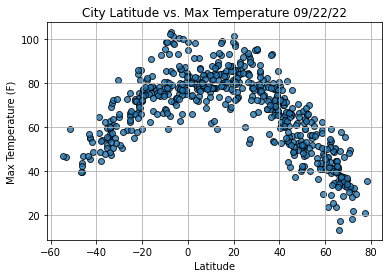

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


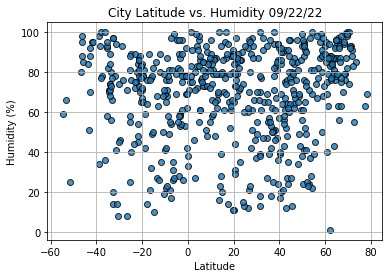

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


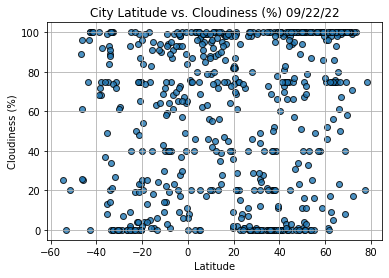

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


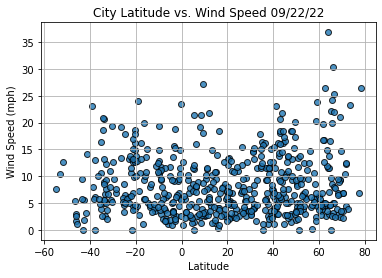

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [35]:
#In a new cell of our WeatherPy.ipynb Jupyter Notebook file, let's create a function, "plot_linear_regression",
#and add the four parameters inside the parentheses. Our function declaration should look like the following.

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
#In our function, we have four parameters: x_values, y_values, y_label, and text_coordinates, 
#and we will add a fifth parameter for the title, called, title. Now, add the algorithm we use to 
#perform the linear regression underneath the function. Our function should look like the following.

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
#Create the Hemisphere DataFrames
#We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. 
#To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

#To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. 
#The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. 
#The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].

#Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] 
#in a cell and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. 
#Note that you may see a different city in your output cell than the one shown in the following image.
index13 = city_data_df.loc[13]
index13

City                   Vila Velha
Country                        BR
Date          2022-09-22 16:59:57
Lat                      -20.3297
Lng                      -40.2925
Max Temp                    85.95
Humidity                       65
Cloudiness                      0
Wind Speed                  16.11
Name: 13, dtype: object

In [38]:
#We can also filter a DataFrame based on a value of a row. For instance, if we wanted to get all Northern Hemisphere latitudes, 
#for latitudes greater than or equal to 0, we can filter the city_data_df DataFrame using the 
#code city_data_df["Lat"] >= 0. Executing this code will return either "True" or "False" for all the rows that meet these criteria.

city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
570    False
571    False
572     True
573     True
574     True
Name: Lat, Length: 575, dtype: bool

In [39]:
#If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, 
#we can use the loc method on the city_data_df DataFrame. Inside the brackets, we would add 
#the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Oranjestad,AW,2022-09-22 17:06:28,12.5240,-70.0270,87.75,66,75,8.05
3,Tuktoyaktuk,CA,2022-09-22 17:06:29,69.4541,-133.0374,33.80,100,100,9.22
5,Saskylakh,RU,2022-09-22 17:06:29,71.9167,114.0833,18.16,88,71,4.43
7,Palafrugell,ES,2022-09-22 17:00:48,41.9174,3.1631,73.35,56,5,3.00
9,Albany,US,2022-09-22 16:57:20,42.6001,-73.9662,62.51,91,99,9.57


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

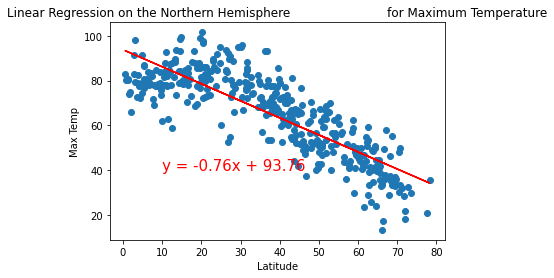

In [41]:
#Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere
#To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. 
#Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.

#Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot.
#Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

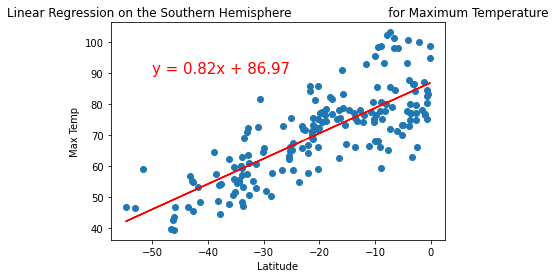

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


In [43]:
#The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is 
#less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here.
#This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from 
#the equator the temperatures become cooler. Check the r-values for your plots. 

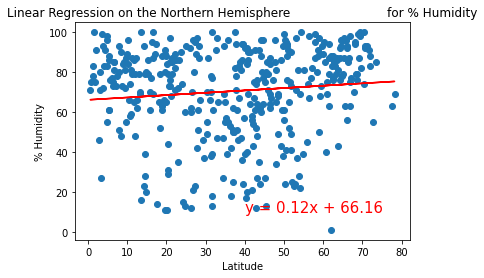

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


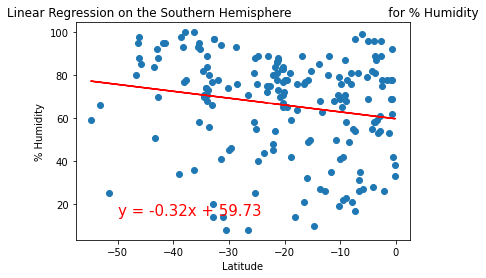

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [46]:
#The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern 
#and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to 
#changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 



In [47]:
#skill drill. refactor code for linear regression lines and create the x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
#Call the plot_linear_regression function with the correct arguments to create the linear regression line and plot 
#for percent cloudiness in the Northern Hemisphere. It should look like the following plot.

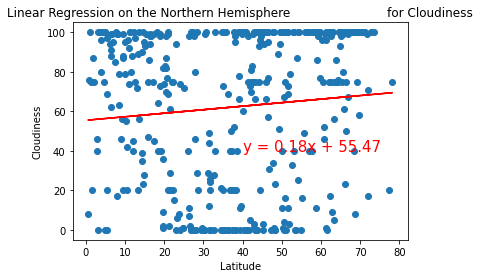

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', 'Cloudiness',(40,40))


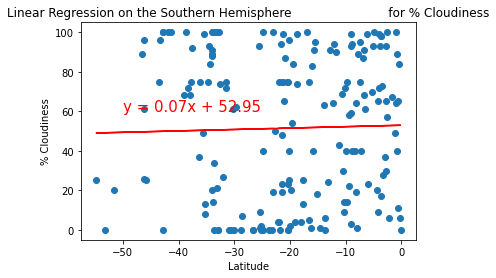

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [55]:

#The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the 
#Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. 
#This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness.
#Check the r-values for your plots. 

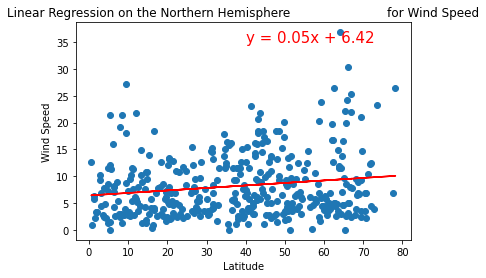

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

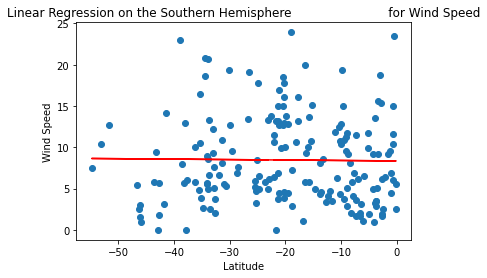

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [58]:
#The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for 
#the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. 
#This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 
#Check the r-values for your plots. 

